# H&M fashion recomendation

## Download dataset from kaggle

Click on select files and select kaggle token

In [ ]:
!pip install --upgrade pip setuptools
!pip install recommenders
!pip install papermill
!pip install scrapbook

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"carlosaxelgarcavega","key":"ca5d49aeb5d9911b420a2669844f08f2"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle competitions download -c h-and-m-personalized-fashion-recommendations  #Download all datasets
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f customers.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv

articles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
customers.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
transactions_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir H-and-M
!unzip articles.csv.zip -d H-and-M
!unzip customers.csv.zip -d H-and-M
!unzip transactions_train.csv.zip -d H-and-M

mkdir: cannot create directory ‘H-and-M’: File exists
Archive:  articles.csv.zip
replace H-and-M/articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  customers.csv.zip
replace H-and-M/customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  transactions_train.csv.zip
replace H-and-M/transactions_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## import libraries and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
sns.set_theme()

In [ ]:
articles = pd.read_csv("H-and-M/articles.csv")
customers = pd.read_csv("H-and-M/customers.csv")
transactions = pd.read_csv("H-and-M/transactions_train.csv")

## Exploratory Data Analysis

### Articles DF

In [ ]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Missing Values:

In [ ]:
articles['detail_desc'].isnull().sum()

416

Although 'articles' has missing values in 'detail_desc' attribute, they do not realy affect our purpose.

Now, we can also look at the percentage of instances that belongs to a particular value for some attributes.

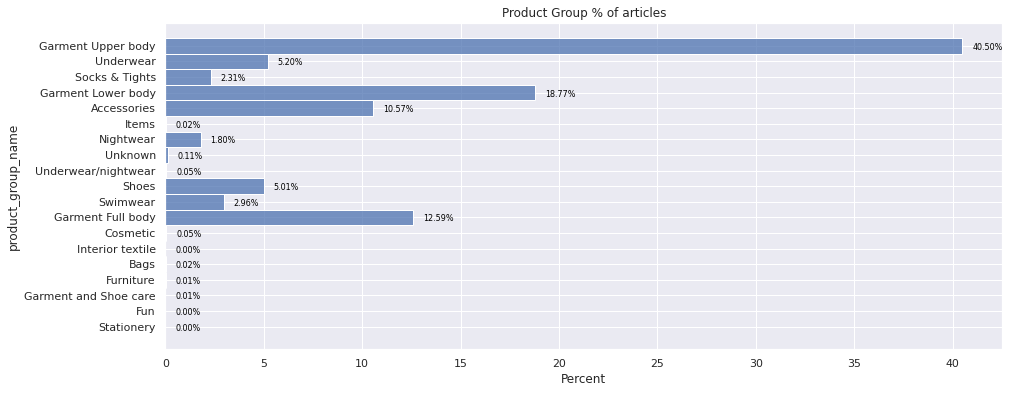

In [ ]:
f, ax = plt.subplots(figsize =(15, 6))
fg = sns.histplot(data=articles, y='product_group_name', discrete=True, stat='percent')

i = 0
for value in articles['product_group_name'].unique():
  count = articles[articles.product_group_name == '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.5 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=8)
  i += 1

plt.title('Product Group % of articles')
plt.tight_layout
plt.show()

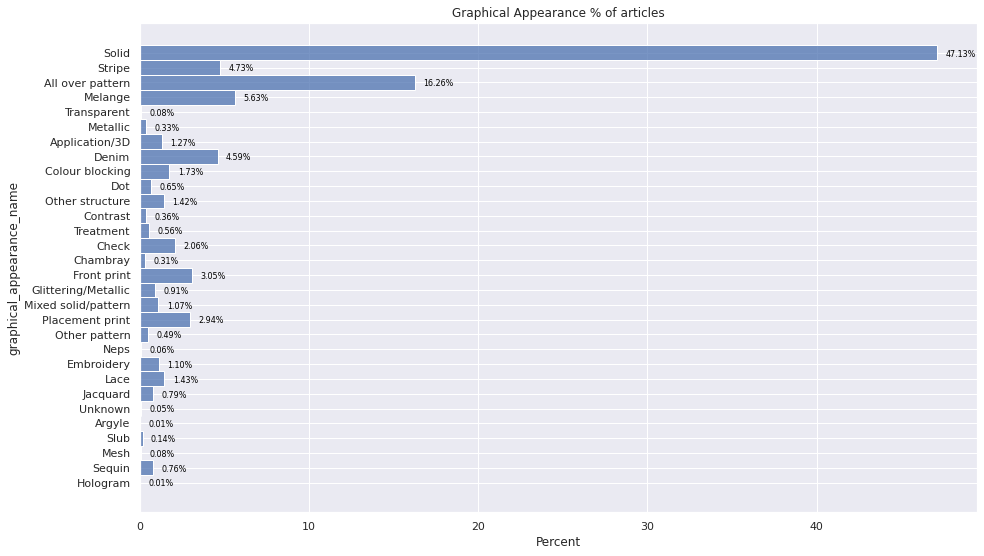

In [ ]:
f, ax = plt.subplots(figsize =(15, 9))


fg = sns.histplot(data=articles, y='graphical_appearance_name', discrete=True, stat='percent')

i = 0
for value in articles['graphical_appearance_name'].unique():
  count = articles[articles.graphical_appearance_name == '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.5 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=8)
  i += 1

plt.title('Graphical Appearance % of articles')
plt.tight_layout
plt.show()

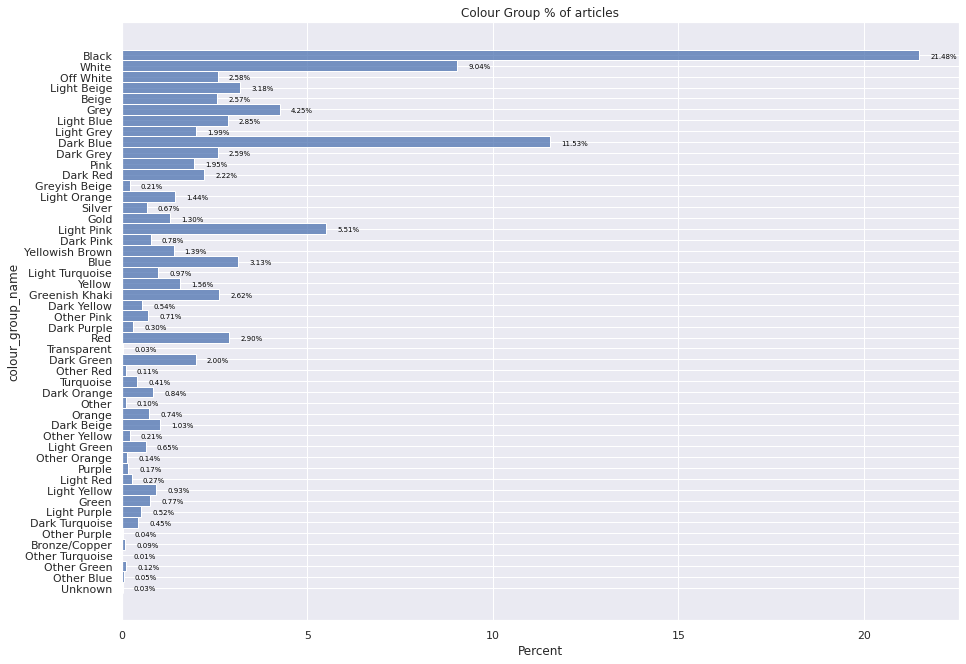

In [ ]:
f, ax = plt.subplots(figsize =(15, 11))


fg = sns.histplot(data=articles, y='colour_group_name', discrete=True, stat='percent')

i = 0
for value in articles['colour_group_name'].unique():
  count = articles[articles.colour_group_name == '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.3 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=7)
  i += 1

plt.title('Colour Group % of articles')
plt.tight_layout
plt.show()

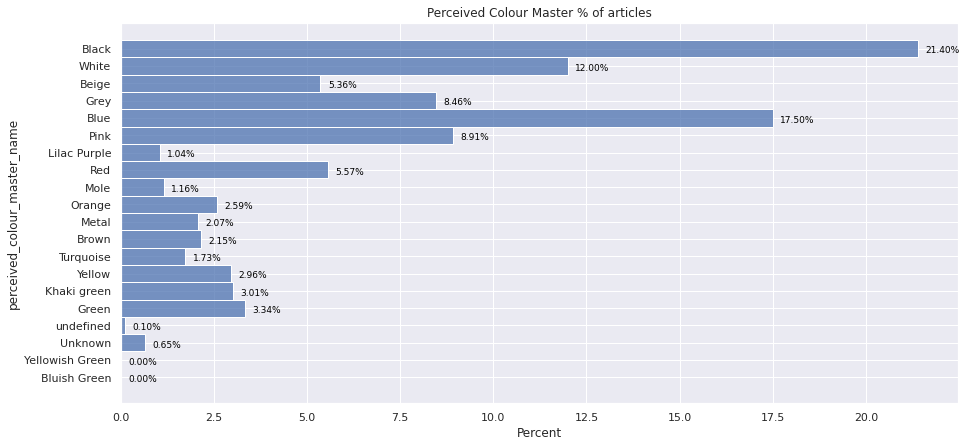

In [ ]:
f, ax = plt.subplots(figsize =(15, 7))


fg = sns.histplot(data=articles, y='perceived_colour_master_name', discrete=True, stat='percent')

i = 0
for value in articles['perceived_colour_master_name'].unique():
  count = articles[articles.perceived_colour_master_name== '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.2 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=9)
  i += 1

plt.title('Perceived Colour Master % of articles')
plt.tight_layout
plt.show()

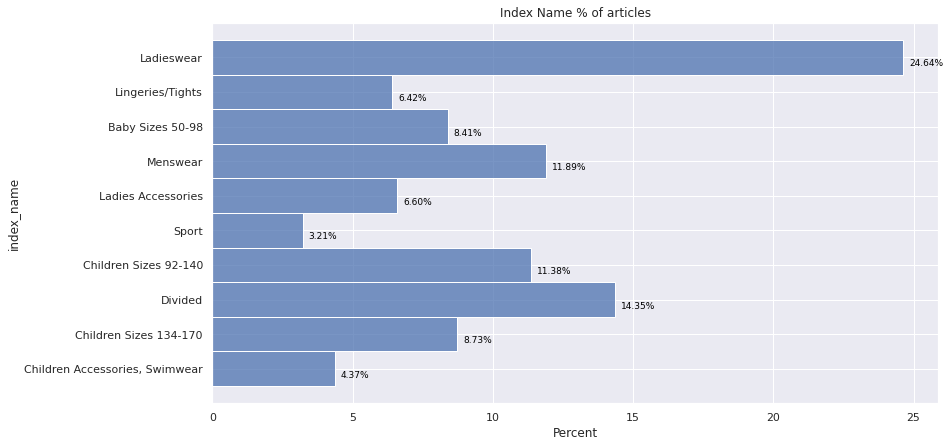

In [ ]:
f, ax = plt.subplots(figsize =(13, 7))


fg = sns.histplot(data=articles, y='index_name', discrete=True, stat='percent')

i = 0
for value in articles['index_name'].unique():
  count = articles[articles.index_name== '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.2 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=9)
  i += 1

plt.title('Index Name % of articles')
plt.tight_layout
plt.show()

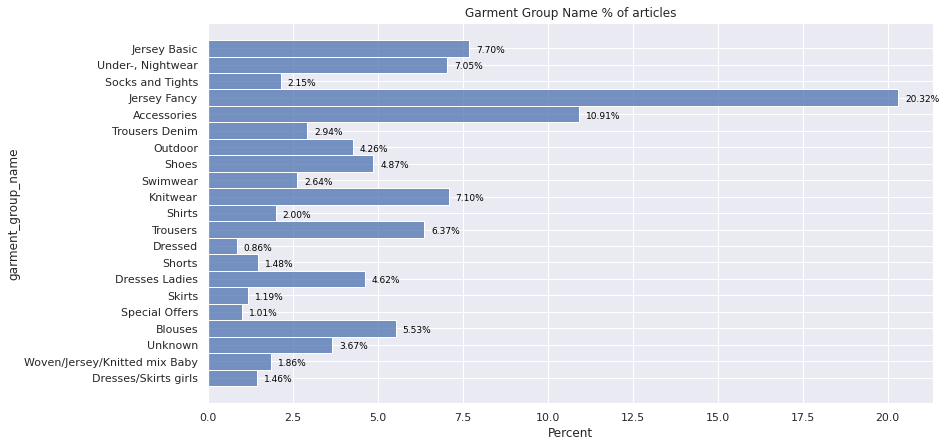

In [ ]:
f, ax = plt.subplots(figsize =(13, 7))


fg = sns.histplot(data=articles, y='garment_group_name', discrete=True, stat='percent')

i = 0
for value in articles['garment_group_name'].unique():
  count = articles[articles.garment_group_name== '{}'.format(value)].shape[0]
  percentage = (count/articles.shape[0])*100
  ax.text(percentage + 0.2 , i+0.25, '%.2f'%percentage + '%', color='black', fontsize=9)
  i += 1

plt.title('Garment Group Name % of articles')
plt.tight_layout
plt.show()

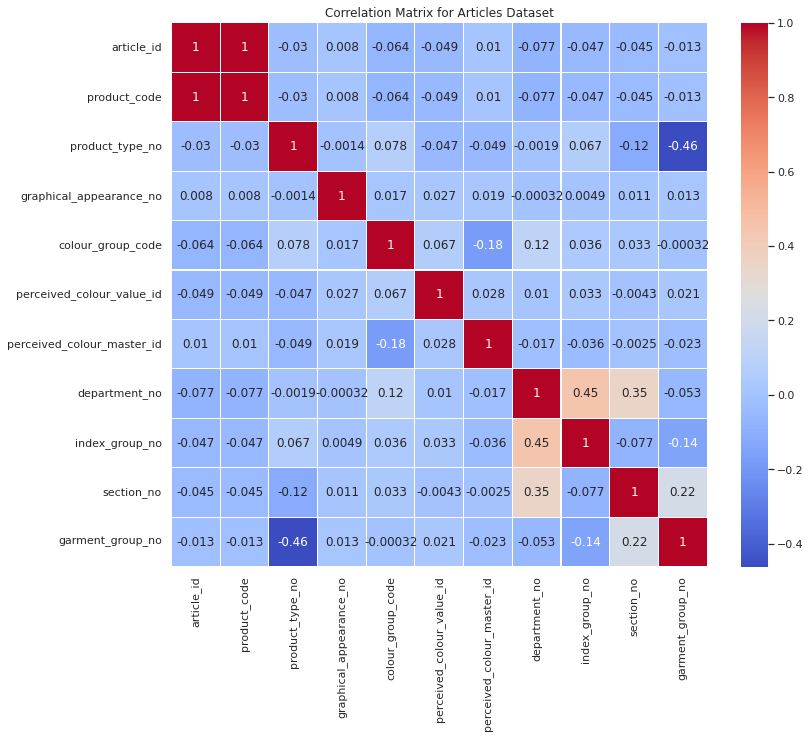

In [ ]:
corrmat = articles.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1, annot=True)
plt.title('Correlation Matrix for Articles Dataset')
plt.tight_layout
plt.show()

From the correlation matrix of articles, we can observe that '*product_code*' is totally correlated with our target '*articles_id*', thus we may drop this attribute. Moreover, there is not any other strong correlation.

In [ ]:
articles.drop('product_code',axis='columns', inplace=True)

### Customers DF

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
len(customers['age'].unique())

85

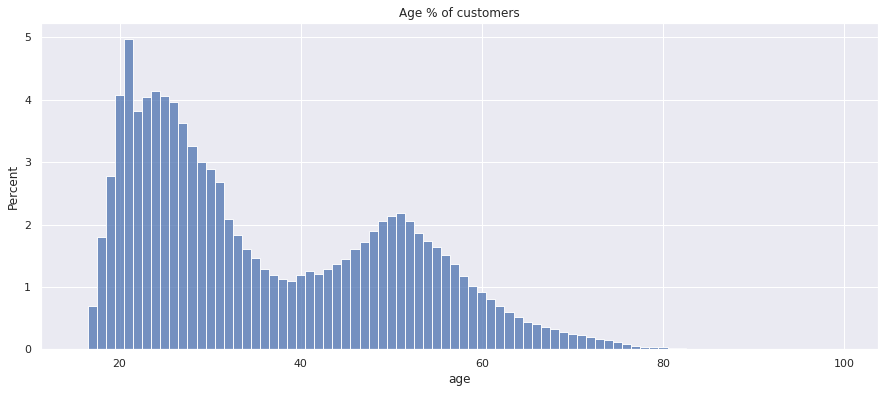

In [ ]:
f, ax = plt.subplots(figsize =(15, 6))
fg = sns.histplot(data=customers, x='age', discrete=True, stat='percent')

plt.title('Age % of customers')
plt.tight_layout
plt.show()

In [ ]:
customers['age'].median()

32.0

In [ ]:
customers['age'].mean()

36.386964565794

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
print('Number of missing values in FN: ', customers['FN'].isnull().sum())
print('Number of missing values in Active: ', customers['Active'].isnull().sum())

Number of missing values in FN:  895050
Number of missing values in Active:  907576


These missing values in binary attributes '*FN*' and '*Active*' could be replaced by value 0. 

In [ ]:
customers['FN']=customers['FN'].fillna(0)
customers['Active']=customers['Active'].fillna(0)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers.isna().sum()

customer_id                   0
FN                            0
Active                        0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
postal_code                   0
dtype: int64

In [ ]:
# We can drop these null values since there are pretty small percentage of the whole dataset (over a million instances).
customers = customers.dropna()
customers.shape

(1338570, 7)

In [ ]:
# Attribute 'fashion_news_frequency' has values NONE and None, which means the same, thus we have to replace one of those.
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', 'Monthly', 'None'], dtype=object)

In [ ]:
cleanup_values = {"fashion_news_frequency": {"NONE": 'None'}}
customers = customers.replace(cleanup_values)
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

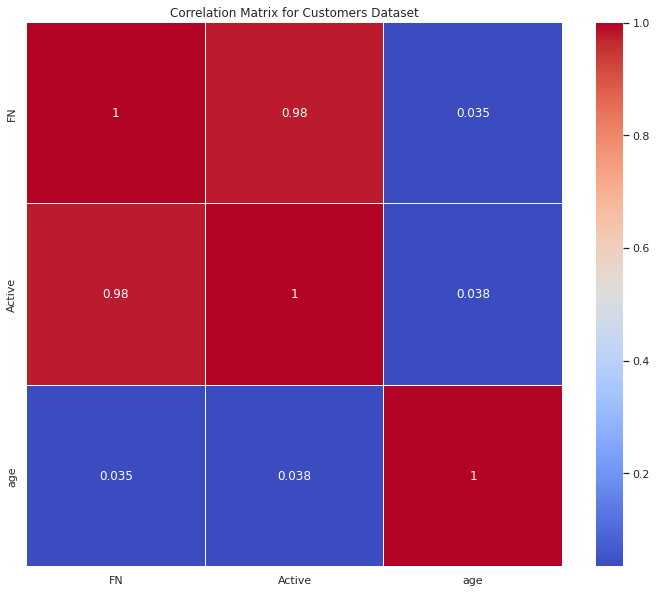

In [ ]:
corrmat = customers.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1, annot=True)
plt.title('Correlation Matrix for Customers Dataset')
plt.tight_layout
plt.show()

If we apply encoding to categorical attributes:

In [ ]:
for cat_attr in ['club_member_status',	'fashion_news_frequency']:
  ord_enc = OrdinalEncoder()
  customers[cat_attr] = ord_enc.fit_transform(customers[[cat_attr]])
  
customers.sample(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
999756,ba8ee80fa331f6cc23bc7c19865137c87f1912b73a1441...,0.0,0.0,0.0,1.0,60.0,aee111f42aebc6ff26968d9c7b9194b75edcd2d270f51f...
541856,65279ac8cc0baf0b0963f459d2fc4a164a39769e23c016...,1.0,1.0,0.0,2.0,29.0,3e5fb853e4bb86d2e08f74da7ed01dda608f76c1472561...
731548,88904f514a9fd46f625f0aad0490e71ed6da72c5414d19...,1.0,1.0,0.0,2.0,40.0,769e9509828ebd4000ba1d8f665733e1133e399d7af1e5...
770484,8fd4ac9f4b0494fa67acf1683b9a53eb886554714b1822...,0.0,0.0,2.0,1.0,51.0,c62a5bca752f33adb8a83a2ef64e037c90a2c3d302510d...
818214,98c115aab74c7d960a63bf3078e9939ff30d064aec968a...,0.0,0.0,0.0,1.0,44.0,579f68f3b805090014677c91ed78abc42c67b083c966e6...


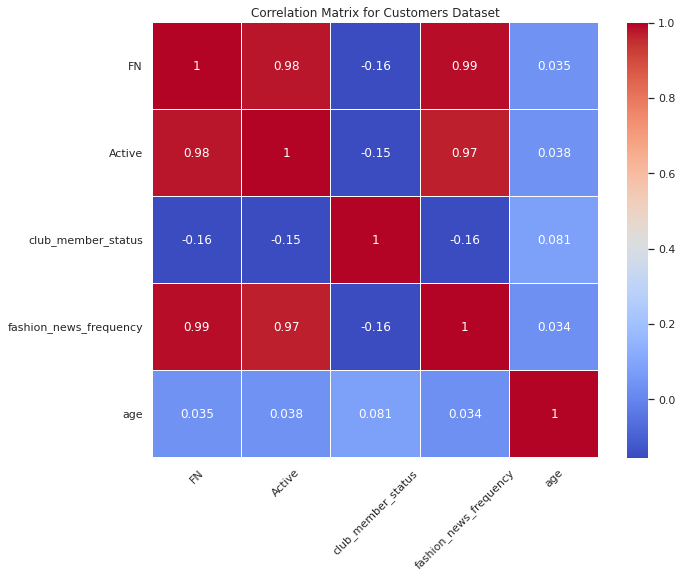

In [ ]:
corrmat = customers.corr()
  
f, ax = plt.subplots(figsize =(10, 8))
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1, annot=True, )
plt.title('Correlation Matrix for Customers Dataset')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

Attributes '*FN*', '*Active*' and '*fashion_news_frequency*' have very strong correlation, it could be unnecesary information for following tasks. We decided to drop 'FN' and 'fashion_news_frequency'.

In [ ]:
customers.drop('FN',axis='columns', inplace=True)
customers.drop('fashion_news_frequency',axis='columns', inplace=True)

### Transactions DF

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001.0,0.050831,2.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023.0,0.030492,2.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004.0,0.015237,2.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003.0,0.016932,2.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004.0,0.016932,2.0


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373717 entries, 0 to 18373716
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        float64
 3   price             float64
 4   sales_channel_id  float64
dtypes: float64(3), object(2)
memory usage: 700.9+ MB


In [ ]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          1
price               1
sales_channel_id    1
dtype: int64

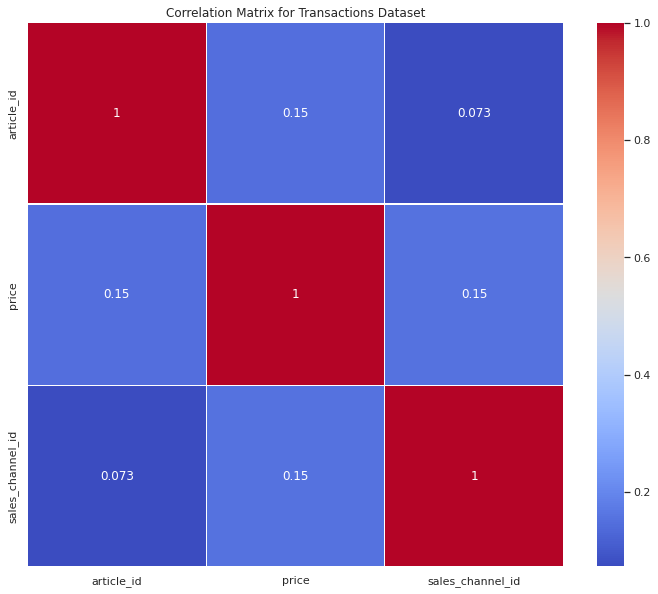

In [ ]:
corr_transactions = transactions.corr()

f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corr_transactions, ax = ax, cmap ="coolwarm", linewidths = 0.1, annot=True)
plt.title('Correlation Matrix for Transactions Dataset')
plt.tight_layout
plt.show()

### Merging datasets

In [ ]:
trans_cust = pd.merge(customers, transactions, on='customer_id')
trans_cust.head()

,customer_id,Active,club_member_status,age,postal_code,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001.0,0.044051,1.0
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023.0,0.035576,1.0
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010.0,0.030492,1.0
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006.0,0.010153,2.0
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006.0,0.050831,2.0


In [ ]:
articles_numeric = articles.select_dtypes(exclude = ['object'])
articles_numeric.head()

,article_id,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
0,108775015,253,1010016,9,4,5,1676,1,16,1002
1,108775044,253,1010016,10,3,9,1676,1,16,1002
2,108775051,253,1010017,11,1,9,1676,1,16,1002
3,110065001,306,1010016,9,4,5,1339,1,61,1017
4,110065002,306,1010016,10,3,9,1339,1,61,1017


In [ ]:
articles_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   article_id                  105542 non-null  int64
 1   product_type_no             105542 non-null  int64
 2   graphical_appearance_no     105542 non-null  int64
 3   colour_group_code           105542 non-null  int64
 4   perceived_colour_value_id   105542 non-null  int64
 5   perceived_colour_master_id  105542 non-null  int64
 6   department_no               105542 non-null  int64
 7   index_group_no              105542 non-null  int64
 8   section_no                  105542 non-null  int64
 9   garment_group_no            105542 non-null  int64
dtypes: int64(10)
memory usage: 8.1 MB


In [ ]:
# el bueno
sales = pd.merge(pd.merge(customers, transactions, on='customer_id'),articles.select_dtypes(exclude = ['object']), on='article_id')
sales.tail()

,customer_id,Active,club_member_status,age,postal_code,t_dat,article_id,price,sales_channel_id,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
18150010,ffe6e53e0ac98cd3da1697e057f24f002482ef00d0573b...,1.0,0.0,22.0,33d9979ccb06b21a8bceb85fb5df2f4f1b76bb54321d54...,2018-09-26,420378005.0,0.008458,1.0,66,1010011,61,3,6,3948,2,52,1019
18150011,fff22c025716b0f38fadb92a2bd09881c98e11368589c1...,1.0,0.0,41.0,dec063c59d14bffb2c70678c6f5c76747b3311042d627b...,2018-11-20,548377002.0,0.020322,2.0,265,1010017,10,3,9,1676,1,16,1002
18150012,fff3e75605ec575be9b95eda1e6557299e81bba12668d7...,1.0,0.0,33.0,850c031ff0de6976751bf75aceaaef490c405ac15fe54f...,2018-10-17,618853001.0,0.023712,2.0,272,1010016,33,2,13,7617,4,76,1009
18150013,fff4381593e170ca0aea188998487c830d9a4070c9ec4b...,0.0,0.0,27.0,3d2d7c5e7aa259ef065aba0c397fe00681aa60ae0c1a59...,2019-03-18,533932004.0,0.015237,2.0,253,1010008,31,1,3,8316,26,5,1005
18150014,fffb4d23c21989abee6652e2d6cdecb874c3534c62bf4b...,0.0,0.0,31.0,ae12e84ceea1a36fbe4b2df268cf4f3fe27b40bd3700f0...,2018-10-01,568499001.0,0.008458,1.0,252,1010017,73,4,2,7658,4,46,1003


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18150015 entries, 0 to 18150014
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   customer_id                 object 
 1   Active                      float64
 2   club_member_status          float64
 3   age                         float64
 4   postal_code                 object 
 5   t_dat                       object 
 6   article_id                  float64
 7   price                       float64
 8   sales_channel_id            float64
 9   product_type_no             int64  
 10  graphical_appearance_no     int64  
 11  colour_group_code           int64  
 12  perceived_colour_value_id   int64  
 13  perceived_colour_master_id  int64  
 14  department_no               int64  
 15  index_group_no              int64  
 16  section_no                  int64  
 17  garment_group_no            int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.6+ GB


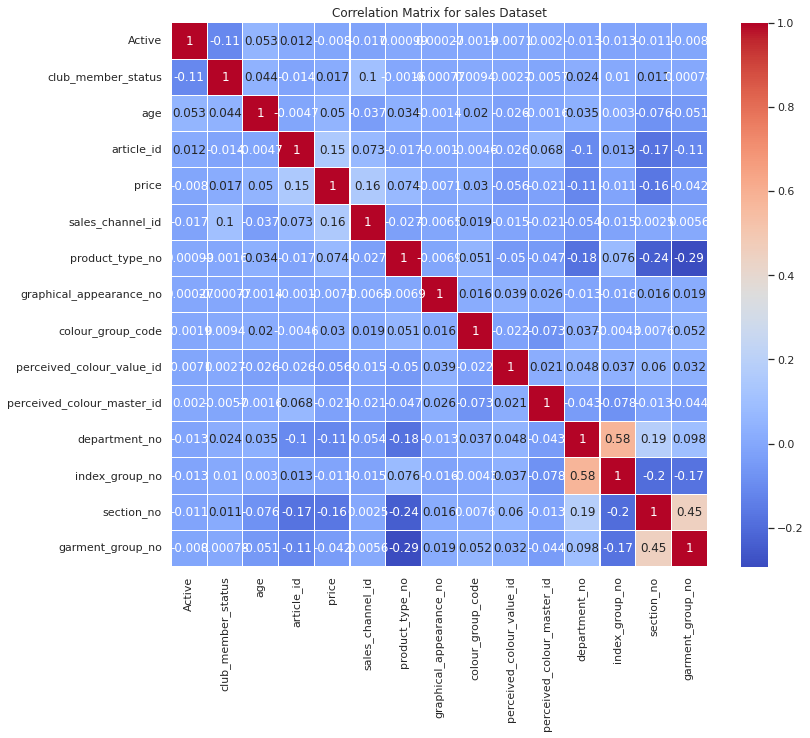

In [ ]:
corr_sales = sales.corr()

f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corr_sales, ax = ax, cmap ="coolwarm", linewidths = 0.1, annot=True)
plt.title('Correlation Matrix for sales Dataset')
plt.tight_layout
plt.show()

In [ ]:
df = transactions.drop(["t_dat", "price"], axis=1)
df = df.groupby(["customer_id", "article_id"], as_index=False).count()
df.rename(columns={"sales_channel_id": "purchases"}, inplace=True)
df.head()

,customer_id,article_id,purchases
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023.0,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006.0,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008.0,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001.0,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,627759010.0,1


In [ ]:
df['purchases'].unique()

array([  1,   2,   3,   4,   5,   6,  12,   7,  10,  13,   8,   9,  11,
        14,  50, 120,  15,  19,  17,  30,  16,  18,  21,  23,  24,  60,
        63,  20,  33,  22,  35,  34,  45,  26,  36,  32,  42,  29,  43,
        25,  28,  27,  31, 100,  41,  37,  39,  40,  80,  49,  38,  61,
        62,  46,  56,  59,  44,  52,  72,  48, 166,  70, 188,  53,  73,
       199,  64,  94,  51,  55, 109,  54,  90, 124, 570, 130, 170,  86])

# Modeling

In [ ]:
import sys
import os
import torch
import cornac
import papermill as pm
import scrapbook as sb
import pandas as pd
from recommenders.datasets import movielens
from recommenders.datasets.python_splitters import python_random_split
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED

print("System version: {}".format(sys.version))
print("PyTorch version: {}".format(torch.__version__))
print("Cornac version: {}".format(cornac.__version__))

System version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
PyTorch version: 1.11.0+cu113
Cornac version: 1.14.2


In [ ]:
# top k items to recommend
TOP_K = 10

# Model parameters
LATENT_DIM = 50
ENCODER_DIMS = [100]
ACT_FUNC = "tanh"
LIKELIHOOD = "pois"
NUM_EPOCHS = 5
BATCH_SIZE = 128
LEARNING_RATE = 0.001

In [ ]:
train, test = python_random_split(df, 0.75)

In [ ]:
train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)

print('Number of  customers: {}'.format(train_set.num_users))
print('Number of articles: {}'.format(train_set.num_items))

Number of  customers: 1007530
Number of articles: 73195


In [ ]:
bivae = cornac.models.BiVAECF(
    k=LATENT_DIM,
    encoder_structure=ENCODER_DIMS,
    act_fn=ACT_FUNC,
    likelihood=LIKELIHOOD,
    n_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)

with Timer() as t:
    bivae.fit(train_set)
print("Took {} seconds for training.".format(t))

KeyboardInterrupt: ignored